# **5-Minute Crafts : Video Clickbait Titles?**

## Latar Belakang Dataset

5-Minute Crafts adalah channel YouTube yang berisikan DIY atau tips-tips dalam kehidupan sehari-hari yang dimiliki oleh TheSoul Publishing. Ini merupakan salah satu channel yang banyak dilihat. Sehingga YouTube 5-Minute Crafts mendapatkan banyak penayangan. 

## Pertanyaan Analisis

Apakah ada korelasi antara fitur judul, total penayangan, durasi, dan sentimen?

## EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv("/content/5-Minute Crafts.csv")
df.head()

,video_id,title,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
0,v=lCePSP4lb-k,Wow! Let's go live! Epic decorations and DIYS,1,558,10825,45,8,3,1,4,1,5.625000,0,0,0.131818
1,v=G7O9iWWOtTY,EXTREME ROOM TRANSFORMATION || Cool Design Ide...,1,1020,184374,63,10,2,3,0,2,6.300000,0,0,0.112500
2,v=cd0u5IFxBdo,LATE SUMMER HACKS TO SAVE YOUR DAY,2,629,478170,34,7,0,7,0,2,4.857143,0,0,-0.300000
3,v=lWSXHFPqBfo,EVERY SMART PARENT KNOWS THESE USEFUL HACKS #s...,2,41,197359,51,8,1,7,1,1,6.375000,0,0,0.257143
4,v=qqPFeyd84Lg,SMART HACKS TO SAVE YOUR WEDDING DAY🤵‍👰‍💍🕊️,3,784,162025,43,7,0,7,0,2,6.142857,0,0,0.214286


### Dimensi Data

In [3]:
df.shape

(4904, 15)

### Variabel Pada Dataset

In [4]:
df.columns.values 

array(['video_id', 'title', 'active_since_days', 'duration_seconds',
       'total_views', 'num_chars', 'num_words', 'num_punctuation',
       'num_words_uppercase', 'num_words_lowercase', 'num_stopwords',
       'avg_word_len', 'contain_digits', 'startswith_digits',
       'title_sentiment'], dtype=object)

In [5]:
df.dtypes

video_id                object
title                   object
active_since_days        int64
duration_seconds         int64
total_views              int64
num_chars                int64
num_words                int64
num_punctuation          int64
num_words_uppercase      int64
num_words_lowercase      int64
num_stopwords            int64
avg_word_len           float64
contain_digits           int64
startswith_digits        int64
title_sentiment        float64
dtype: object

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4904 entries, 0 to 4903
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_id             4904 non-null   object 
 1   title                4904 non-null   object 
 2   active_since_days    4904 non-null   int64  
 3   duration_seconds     4904 non-null   int64  
 4   total_views          4904 non-null   int64  
 5   num_chars            4904 non-null   int64  
 6   num_words            4904 non-null   int64  
 7   num_punctuation      4904 non-null   int64  
 8   num_words_uppercase  4904 non-null   int64  
 9   num_words_lowercase  4904 non-null   int64  
 10  num_stopwords        4904 non-null   int64  
 11  avg_word_len         4904 non-null   float64
 12  contain_digits       4904 non-null   int64  
 13  startswith_digits    4904 non-null   int64  
 14  title_sentiment      4904 non-null   float64
dtypes: float64(2), int64(11), object(2)
me

### Mengecek Missing Data

In [7]:
df.isnull().sum()

video_id               0
title                  0
active_since_days      0
duration_seconds       0
total_views            0
num_chars              0
num_words              0
num_punctuation        0
num_words_uppercase    0
num_words_lowercase    0
num_stopwords          0
avg_word_len           0
contain_digits         0
startswith_digits      0
title_sentiment        0
dtype: int64

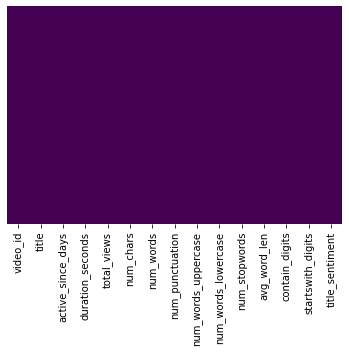

In [8]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

### Mengecek Outlier

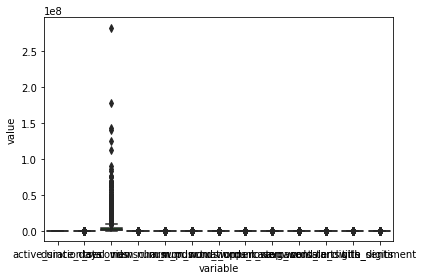

In [9]:
df1=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()

### Melihat Korelasi Data

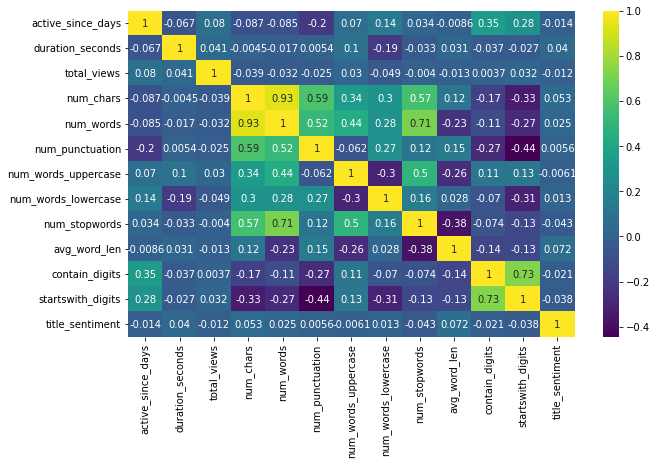

In [10]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

### Melihat Statistik Data

In [11]:
df.describe()

,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
count,4904.000000,4904.000000,4.904000e+03,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000
mean,838.717781,930.058728,4.331059e+06,44.357259,8.198002,0.483279,6.160685,0.285481,2.050571,5.458327,0.925571,0.868679,0.224159
std,420.758400,720.271421,9.706409e+06,13.464467,2.514520,0.892627,2.540208,1.364173,1.375128,0.660674,0.262495,0.337786,0.377441
min,1.000000,27.000000,4.034000e+03,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.666667,0.000000,0.000000,-1.000000
25%,365.000000,697.000000,5.677910e+05,35.000000,6.000000,0.000000,5.000000,0.000000,1.000000,5.000000,1.000000,1.000000,0.000000
50%,730.000000,866.000000,1.459397e+06,43.000000,8.000000,0.000000,6.000000,0.000000,2.000000,5.375000,1.000000,1.000000,0.200000
75%,1095.000000,960.000000,4.298148e+06,51.000000,10.000000,1.000000,8.000000,0.000000,3.000000,5.800000,1.000000,1.000000,0.434375
max,1460.000000,14880.000000,2.830311e+08,100.000000,20.000000,6.000000,18.000000,12.000000,9.000000,10.000000,1.000000,1.000000,1.000000


### Plot Distribusi Data Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

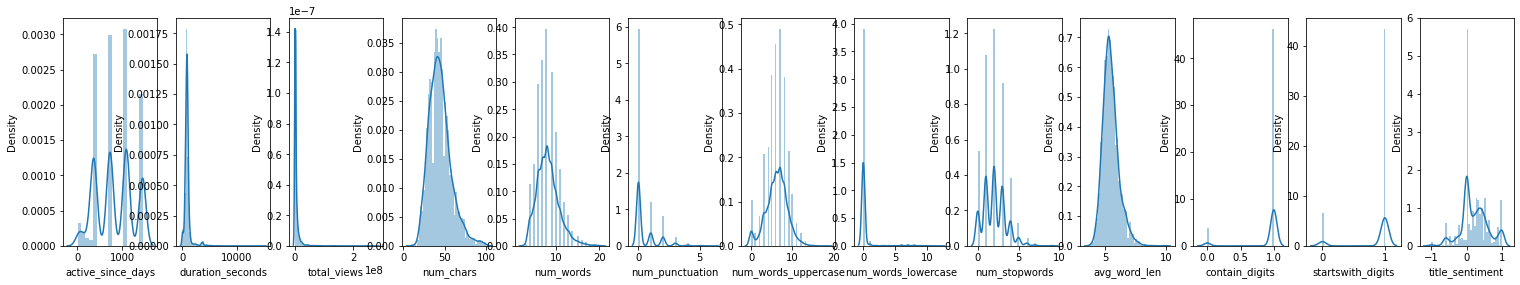

In [12]:
l = df1.columns.values
number_of_columns=len(df1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

### Pairplot

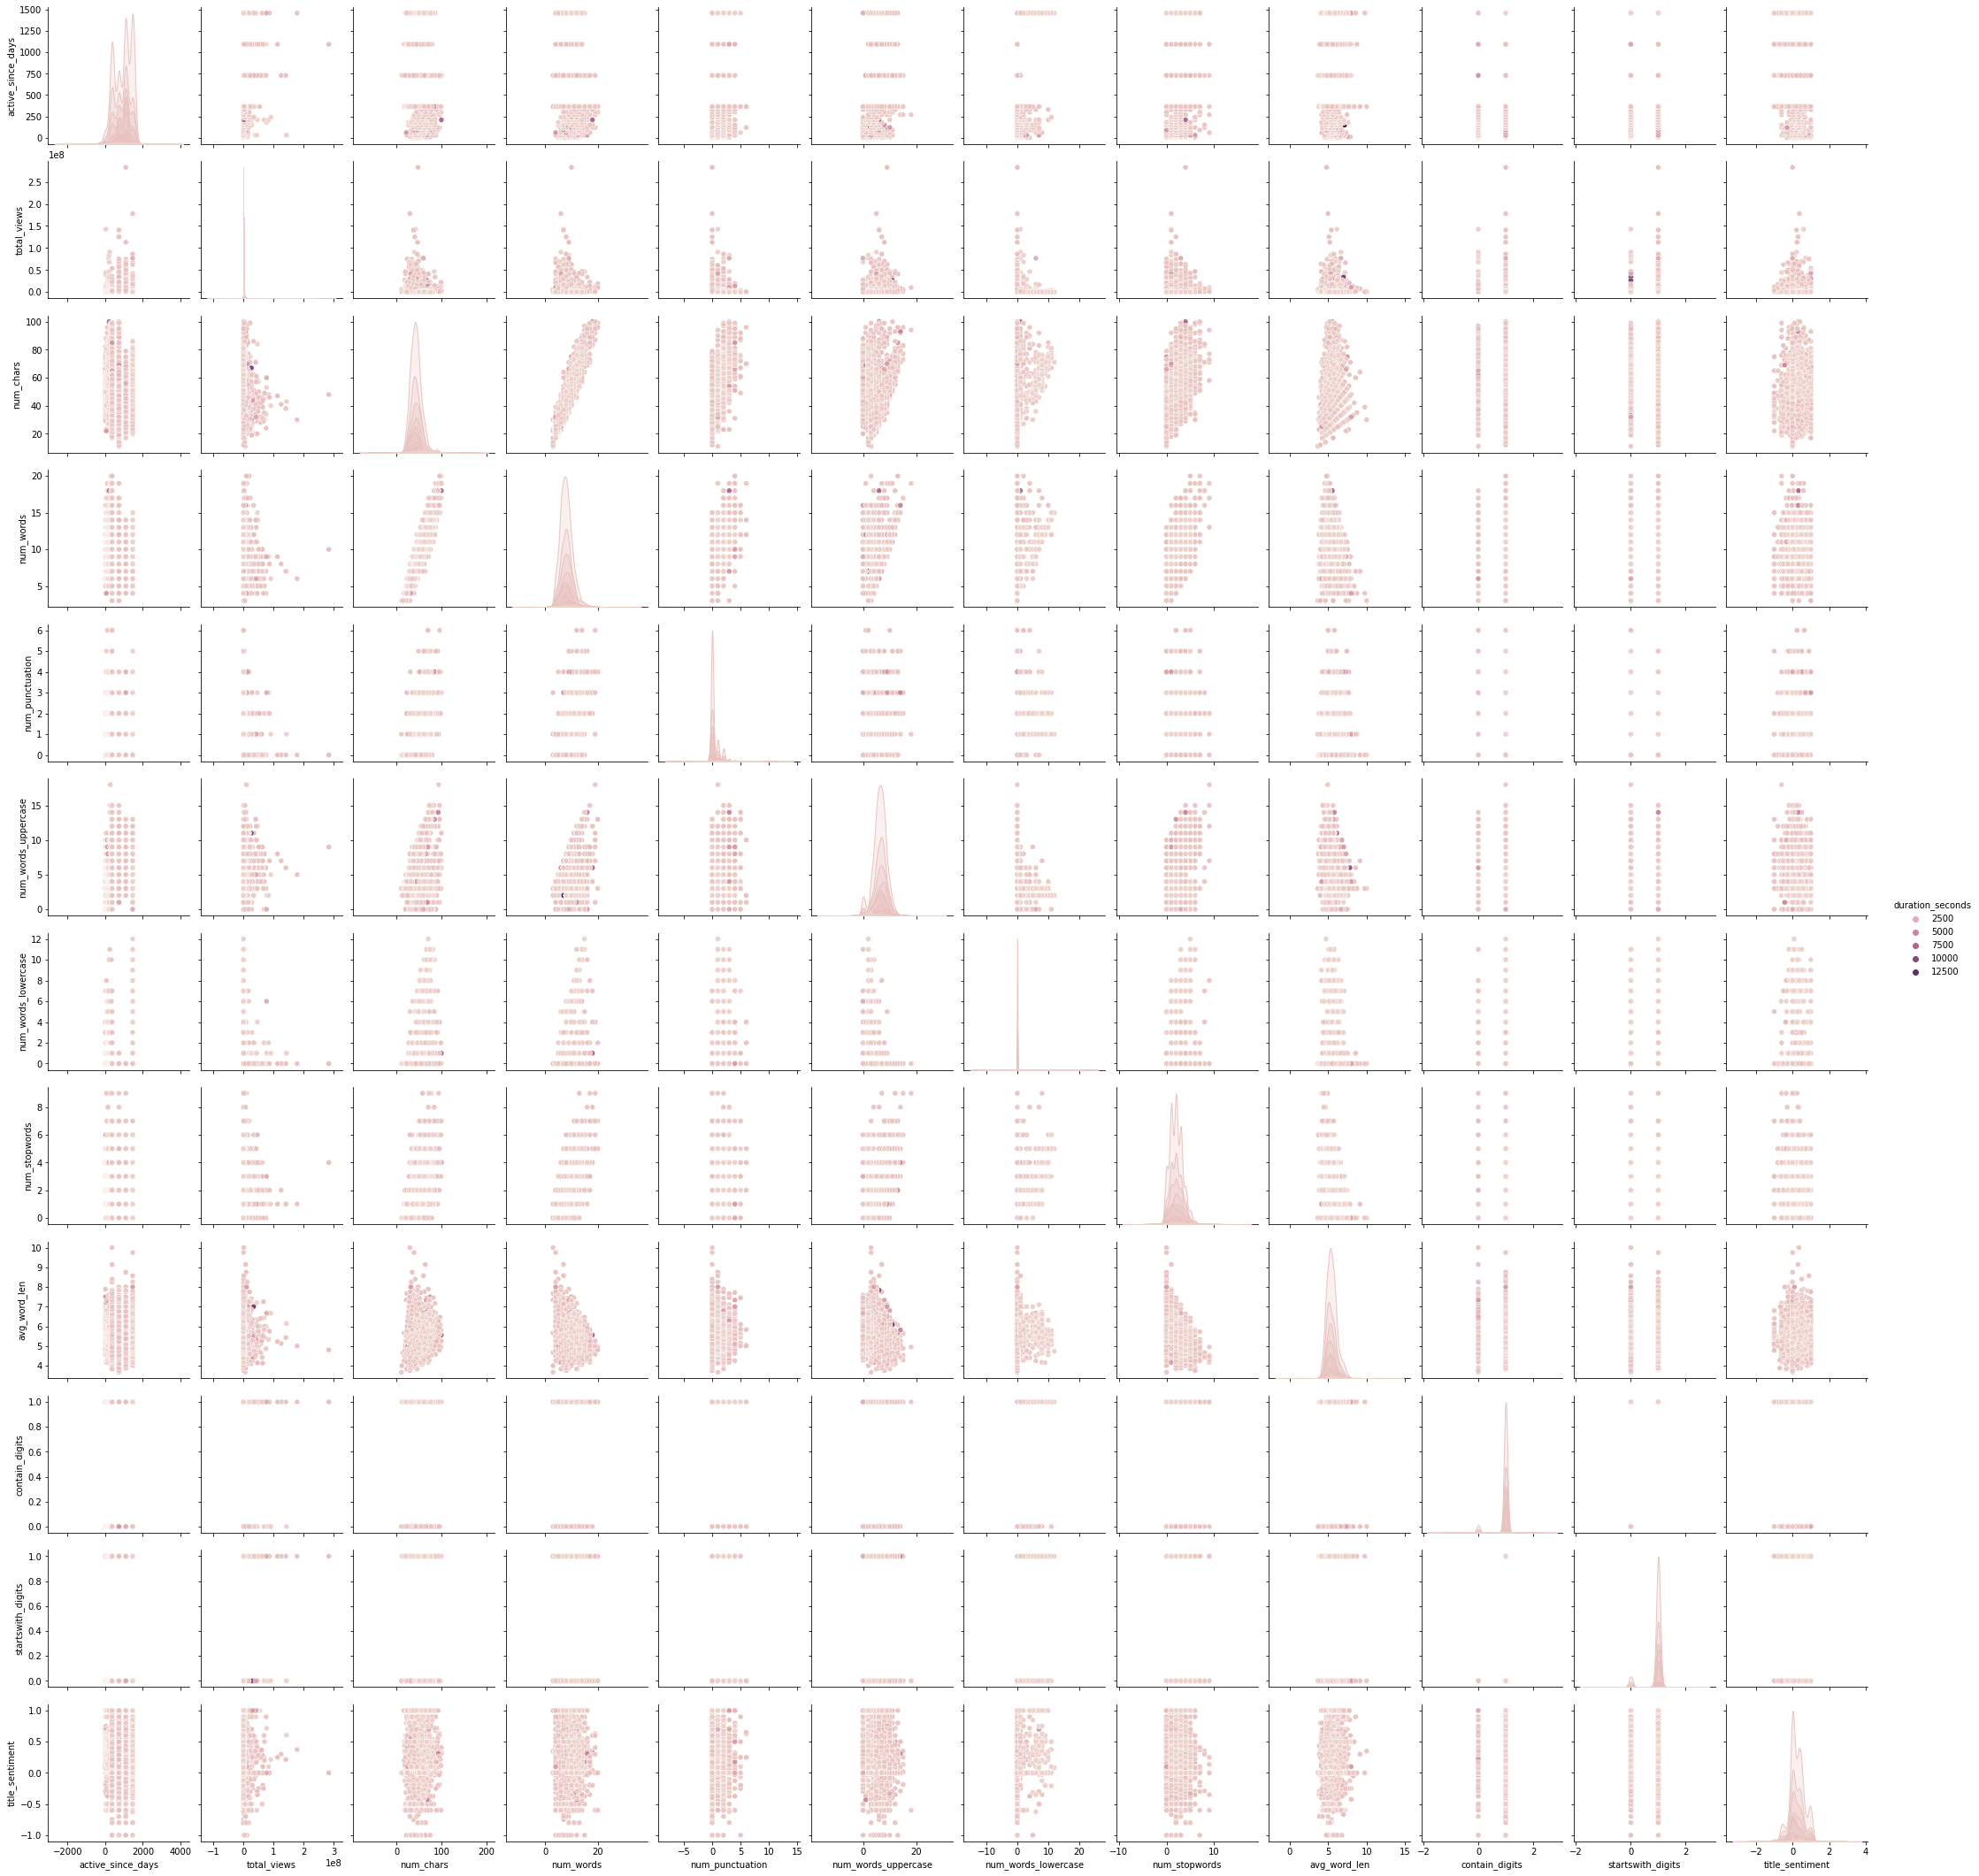

In [13]:
g = sns.pairplot(df1, hue="duration_seconds")

##Data Preparation

### Seleksi Kolom

In [14]:
df=df.drop(columns=['active_since_days', 'num_punctuation'])
df.head()

,video_id,title,duration_seconds,total_views,num_chars,num_words,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
0,v=lCePSP4lb-k,Wow! Let's go live! Epic decorations and DIYS,558,10825,45,8,1,4,1,5.625000,0,0,0.131818
1,v=G7O9iWWOtTY,EXTREME ROOM TRANSFORMATION || Cool Design Ide...,1020,184374,63,10,3,0,2,6.300000,0,0,0.112500
2,v=cd0u5IFxBdo,LATE SUMMER HACKS TO SAVE YOUR DAY,629,478170,34,7,7,0,2,4.857143,0,0,-0.300000
3,v=lWSXHFPqBfo,EVERY SMART PARENT KNOWS THESE USEFUL HACKS #s...,41,197359,51,8,7,1,1,6.375000,0,0,0.257143
4,v=qqPFeyd84Lg,SMART HACKS TO SAVE YOUR WEDDING DAY🤵‍👰‍💍🕊️,784,162025,43,7,7,0,2,6.142857,0,0,0.214286


### Mengisi NaN

In [15]:
df['duration_seconds'].value_counts()

900     679
960     377
1020    265
1080    179
1140    128
       ... 
294       1
4440      1
354       1
386       1
7080      1
Name: duration_seconds, Length: 655, dtype: int64

In [16]:
df['duration_seconds'] = df['duration_seconds'].replace(np.nan, "E49")
df.head()

,video_id,title,duration_seconds,total_views,num_chars,num_words,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
0,v=lCePSP4lb-k,Wow! Let's go live! Epic decorations and DIYS,558,10825,45,8,1,4,1,5.625000,0,0,0.131818
1,v=G7O9iWWOtTY,EXTREME ROOM TRANSFORMATION || Cool Design Ide...,1020,184374,63,10,3,0,2,6.300000,0,0,0.112500
2,v=cd0u5IFxBdo,LATE SUMMER HACKS TO SAVE YOUR DAY,629,478170,34,7,7,0,2,4.857143,0,0,-0.300000
3,v=lWSXHFPqBfo,EVERY SMART PARENT KNOWS THESE USEFUL HACKS #s...,41,197359,51,8,7,1,1,6.375000,0,0,0.257143
4,v=qqPFeyd84Lg,SMART HACKS TO SAVE YOUR WEDDING DAY🤵‍👰‍💍🕊️,784,162025,43,7,7,0,2,6.142857,0,0,0.214286


In [18]:
df['title_sentiment']=df['title_sentiment'].fillna(df['title_sentiment'].mean())
df.head()

,video_id,title,duration_seconds,total_views,num_chars,num_words,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
0,v=lCePSP4lb-k,Wow! Let's go live! Epic decorations and DIYS,558,10825,45,8,1,4,1,5.625000,0,0,0.131818
1,v=G7O9iWWOtTY,EXTREME ROOM TRANSFORMATION || Cool Design Ide...,1020,184374,63,10,3,0,2,6.300000,0,0,0.112500
2,v=cd0u5IFxBdo,LATE SUMMER HACKS TO SAVE YOUR DAY,629,478170,34,7,7,0,2,4.857143,0,0,-0.300000
3,v=lWSXHFPqBfo,EVERY SMART PARENT KNOWS THESE USEFUL HACKS #s...,41,197359,51,8,7,1,1,6.375000,0,0,0.257143
4,v=qqPFeyd84Lg,SMART HACKS TO SAVE YOUR WEDDING DAY🤵‍👰‍💍🕊️,784,162025,43,7,7,0,2,6.142857,0,0,0.214286


In [19]:
df[['title_sentiment','duration_seconds']].isnull().sum()

title_sentiment     0
duration_seconds    0
dtype: int64

### Melakukan Pengkodean(Encoding)

In [24]:
df['total_views'].value_counts()

458033     2
1621907    1
6958787    1
273020     1
1186430    1
          ..
1023301    1
447816     1
2923849    1
1779018    1
274434     1
Name: total_views, Length: 4903, dtype: int64

In [25]:
df['num_chars'].value_counts()

40    178
42    172
46    168
39    162
45    157
     ... 
90      2
98      1
11      1
91      1
12      1
Name: num_chars, Length: 87, dtype: int64

In [26]:
df['duration_seconds'].value_counts()

900     679
960     377
1020    265
1080    179
1140    128
       ... 
294       1
4440      1
354       1
386       1
7080      1
Name: duration_seconds, Length: 655, dtype: int64

In [27]:
df["duration_seconds"] = df["duration_seconds"].astype('category')
df.dtypes

video_id                 object
title                    object
duration_seconds       category
total_views               int64
num_chars                 int64
num_words                 int64
num_words_uppercase       int64
num_words_lowercase       int64
num_stopwords             int64
avg_word_len            float64
contain_digits            int64
startswith_digits         int64
title_sentiment         float64
dtype: object

In [28]:
#Encoding data dengan kategori sangat banyak
df["duration_seconds"] = df["duration_seconds"].cat.codes
df.head()

,video_id,title,duration_seconds,total_views,num_chars,num_words,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
0,v=lCePSP4lb-k,Wow! Let's go live! Epic decorations and DIYS,236,10825,45,8,1,4,1,5.625000,0,0,0.131818
1,v=G7O9iWWOtTY,EXTREME ROOM TRANSFORMATION || Cool Design Ide...,578,184374,63,10,3,0,2,6.300000,0,0,0.112500
2,v=cd0u5IFxBdo,LATE SUMMER HACKS TO SAVE YOUR DAY,307,478170,34,7,7,0,2,4.857143,0,0,-0.300000
3,v=lWSXHFPqBfo,EVERY SMART PARENT KNOWS THESE USEFUL HACKS #s...,8,197359,51,8,7,1,1,6.375000,0,0,0.257143
4,v=qqPFeyd84Lg,SMART HACKS TO SAVE YOUR WEDDING DAY🤵‍👰‍💍🕊️,460,162025,43,7,7,0,2,6.142857,0,0,0.214286


### Menghapus Outlier

In [29]:
#Menghitung Skor IQR
sorted(df)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

duration_seconds       2.030000e+02
total_views            3.730356e+06
num_chars              1.600000e+01
num_words              4.000000e+00
num_words_uppercase    3.000000e+00
num_words_lowercase    0.000000e+00
num_stopwords          2.000000e+00
avg_word_len           8.000000e-01
contain_digits         0.000000e+00
startswith_digits      0.000000e+00
title_sentiment        4.343750e-01
dtype: float64


In [39]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear

,video_id,title,duration_seconds,total_views,num_chars,num_words,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
17,v=_VjRtjLi0w8,30+ AMAZING CRAFT IDEAS & HACKS WITH 3D PEN,577,701802,43,9,7,0,1,4.777778,1,1,0.600000
24,v=2unLZvJpOxE,50 CREATIVE WAYS TO COOK EGGS,576,350782,29,6,5,0,1,4.833333,1,1,0.500000
30,v=nRGFJ6dZSdE,50 BEST ART HACKS FOR BEGINNERS,576,387358,31,6,5,0,1,5.166667,1,1,1.000000
32,v=10lqF2HUlw8,30+ SMART PARENTING HACKS AND CRAFTS,223,1511713,36,6,5,0,1,6.000000,1,1,0.214286
48,v=dzbL3Xquogg,100+ BEST SUMMER HACKS & GADGETS,622,2225970,32,6,4,0,0,5.333333,1,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4726,v=CtzYVy2rtSw,"19 DIYs That'll Make People Say ""You MADE That?!""",296,3180896,49,9,1,0,1,5.444444,1,1,0.000000
4728,v=U6FaL26mCWk,19 DIY Valentine's Day Gifts That Show How Muc...,326,937750,63,13,3,0,3,4.846154,1,1,0.350000
4730,v=OXp5nKHTbB8,23 DIY Projects That Will Blow Your Mind,151,146834,40,8,1,0,3,5.000000,1,1,0.000000
4734,v=jxoPw2imRa0,33 Clothing Hacks That Will Save You A Lot Of ...,112,3768194,51,11,1,0,5,4.636364,1,1,0.000000


## Data Visualization

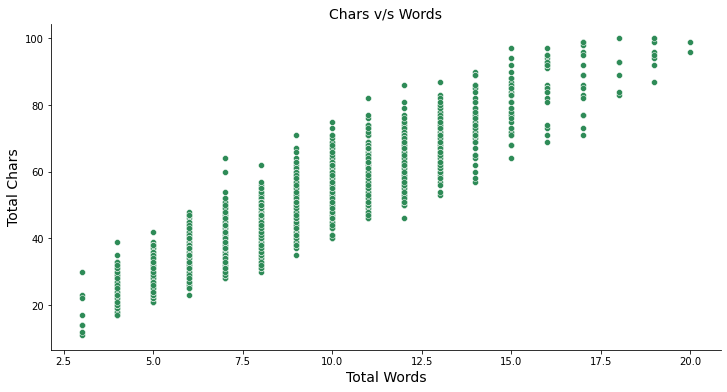

In [50]:
plt.figure(figsize=(12,6));
ax = sns.scatterplot(data=df[df['num_chars'] <500000000], y="num_chars", x='num_words', color='seagreen')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Chars v/s Words", fontsize=14);
plt.xlabel("Total Words", fontsize=14);
plt.ylabel("Total Chars", fontsize=14);

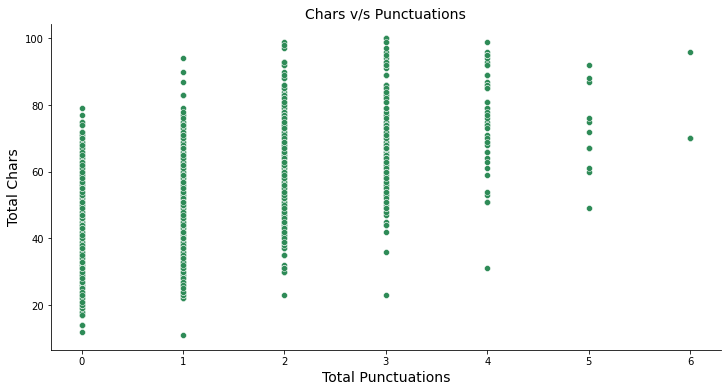

In [51]:
plt.figure(figsize=(12,6));
ax = sns.scatterplot(data=df[df['num_chars'] <500000000], y="num_chars", x='num_punctuation', color='seagreen')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Chars v/s Punctuations", fontsize=14);
plt.xlabel("Total Punctuations", fontsize=14);
plt.ylabel("Total Chars", fontsize=14);

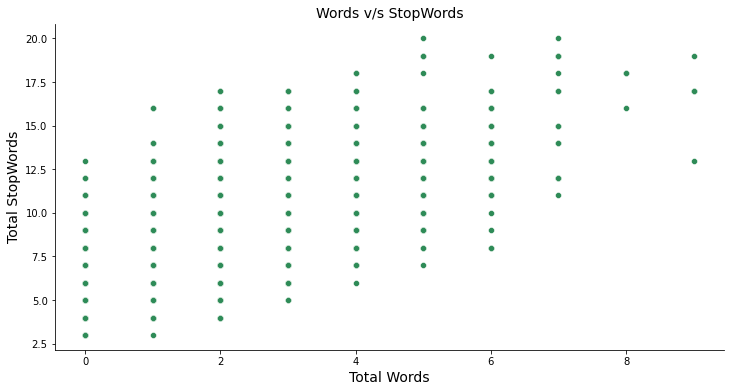

In [52]:
plt.figure(figsize=(12,6));
ax = sns.scatterplot(data=df[df['num_words'] <500000000], y="num_words", x='num_stopwords', color='seagreen')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Words v/s StopWords", fontsize=14);
plt.xlabel("Total Words", fontsize=14);
plt.ylabel("Total StopWords", fontsize=14);

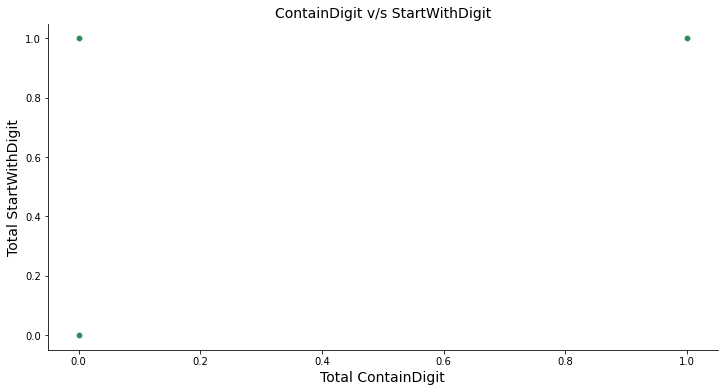

In [53]:
plt.figure(figsize=(12,6));
ax = sns.scatterplot(data=df[df['contain_digits'] <500000000], y="contain_digits", x='startswith_digits', color='seagreen')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("ContainDigit v/s StartWithDigit", fontsize=14);
plt.xlabel("Total ContainDigit", fontsize=14);
plt.ylabel("Total StartWithDigit", fontsize=14);

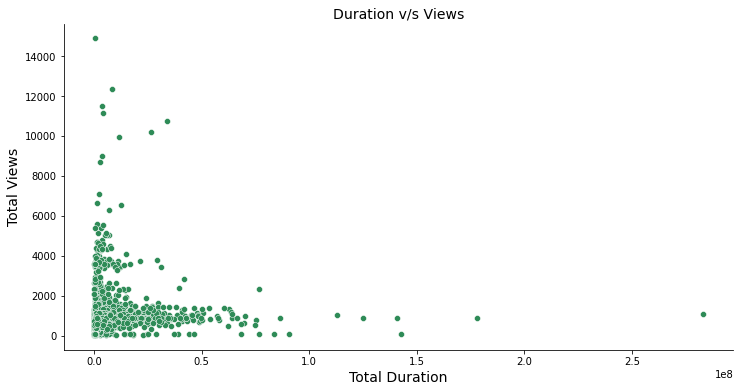

In [54]:
plt.figure(figsize=(12,6));
ax = sns.scatterplot(data=df[df['duration_seconds'] <500000000], y="duration_seconds", x='total_views', color='seagreen')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Duration v/s Views", fontsize=14);
plt.xlabel("Total Duration", fontsize=14);
plt.ylabel("Total Views", fontsize=14);